In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Loading the dataset

In [9]:
df = pd.read_excel("CTG.xls", sheet_name="Raw Data")

In [10]:
df.head()

,FileName,Date,SegFile,b,e,LBE,LB,AC,FM,UC,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Variab10.txt,1996-12-01,CTG0001.txt,240.0,357.0,120.0,120.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
2,Fmcs_1.txt,1996-05-03,CTG0002.txt,5.0,632.0,132.0,132.0,4.0,0.0,4.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,Fmcs_1.txt,1996-05-03,CTG0003.txt,177.0,779.0,133.0,133.0,2.0,0.0,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,Fmcs_1.txt,1996-05-03,CTG0004.txt,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0


### Data preprocessing

In [11]:
df = df.drop(0)
del df["FileName"]
del df["Date"]
del df["SegFile"]
df.head()

,b,e,LBE,LB,AC,FM,UC,ASTV,MSTV,ALTV,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
1,240.0,357.0,120.0,120.0,0.0,0.0,0.0,73.0,0.5,43.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
2,5.0,632.0,132.0,132.0,4.0,0.0,4.0,17.0,2.1,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,177.0,779.0,133.0,133.0,2.0,0.0,5.0,16.0,2.1,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,16.0,2.4,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
5,533.0,1147.0,132.0,132.0,4.0,0.0,5.0,16.0,2.4,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 1 to 2129
Data columns (total 37 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   b         2126 non-null   float64
 1   e         2126 non-null   float64
 2   LBE       2126 non-null   float64
 3   LB        2126 non-null   float64
 4   AC        2126 non-null   float64
 5   FM        2127 non-null   float64
 6   UC        2127 non-null   float64
 7   ASTV      2127 non-null   float64
 8   MSTV      2127 non-null   float64
 9   ALTV      2127 non-null   float64
 10  MLTV      2127 non-null   float64
 11  DL        2128 non-null   float64
 12  DS        2128 non-null   float64
 13  DP        2128 non-null   float64
 14  DR        2128 non-null   float64
 15  Width     2126 non-null   float64
 16  Min       2126 non-null   float64
 17  Max       2126 non-null   float64
 18  Nmax      2126 non-null   float64
 19  Nzeros    2126 non-null   float64
 20  Mode      2126 non-null   floa

In [14]:
df["NSP"].value_counts()

1.0    1655
2.0     295
3.0     176
Name: NSP, dtype: int64

In [18]:
# Changing all the pathologies to be a target. So 3 --> 1 Other --> 0
#df["target"] = df["NSP"].apply(lambda NSP: 1 if NSP == 3 else 0)
# Other version
df["target"] = df["NSP"].apply(lambda NSP: 1 if NSP != 1 else 0)

In [19]:
df["target"].value_counts()

0    1655
1     474
Name: target, dtype: int64

In [20]:
ratio_ones = df['target'].sum() / len(df)
print("The ratio of ones is: {}".format(ratio_ones))

The ratio of ones is: 0.2226397369657116


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [27]:
df=df.dropna()
df.head()
Y = df["target"]
X = df.drop(["target"], axis= 1)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [29]:
clf = LogisticRegression(random_state=42).fit(X_train, y_train)

e:\Users\Fryderyk\miniconda3\envs\projenv\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
preds = clf.predict(X_test)

## Lift Curve

In [43]:
def plot_Lift_curve(y_val, y_pred, step=0.01):
    
    #Define an auxiliar dataframe to plot the curve
    aux_lift = pd.DataFrame()
    #Create a real and predicted column for our new DataFrame and assign values
    aux_lift['real'] = y_val
    aux_lift['predicted'] = y_pred
    #Order the values for the predicted probability column:
    aux_lift.sort_values('predicted',ascending=False,inplace=True)
    
    #Create the values that will go into the X axis of our plot
    x_val = np.arange(step,1+step,step)
    #Calculate the ratio of ones in our data
    ratio_ones = aux_lift['real'].sum() / len(aux_lift)
    #Create an empty vector with the values that will go on the Y axis our our plot
    y_v = []
    
    print(aux_lift.head())
    #Calculate for each x value its correspondent y value
    for x in x_val:
        num_data = int(np.ceil(x*len(aux_lift))) #The ceil function returns the closest integer bigger than our number 
        data_here = aux_lift.iloc[:num_data,:]   # ie. np.ceil(1.4) = 2
        ratio_ones_here = data_here['real'].sum()/len(data_here)
        y_v.append(ratio_ones_here / ratio_ones)
    
    fig, axis = plt.subplots()
    fig.figsize = (40,40)
    axis.plot(x_val, y_v, 'g-', linewidth = 3, markersize = 5)
    axis.plot(x_val, np.ones(len(x_val)), 'k-')
    axis.set_xlabel('Proportion of sample')
    axis.set_ylabel('Lift')
    plt.title('Lift Curve')
    plt.show()

### plot the figure

      real  predicted
2015     0          1
820      1          1
417      1          1
1764     1          1
1772     1          1


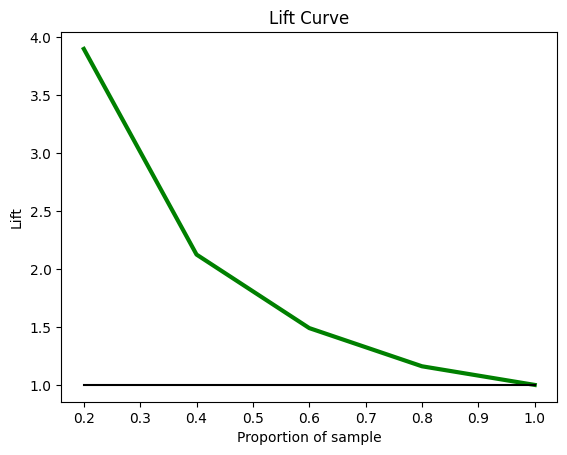

In [48]:
plot_Lift_curve(y_test,preds, 0.2)

In [49]:
from sklearn.metrics import confusion_matrix

In [50]:
confusion_matrix(y_test, preds)

array([[479,  17],
       [ 29, 113]], dtype=int64)